In [46]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# 2 features binary classification

Accuracy:  1.0


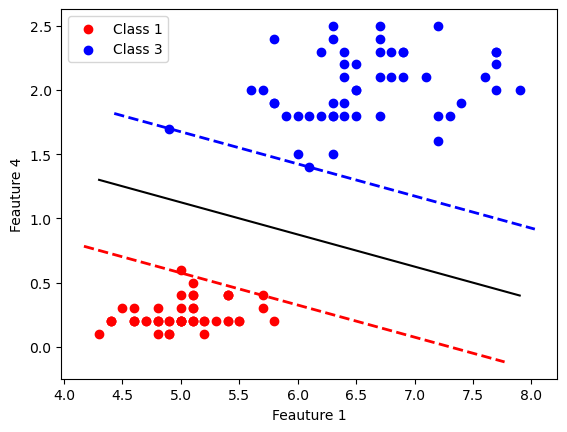

In [58]:
# Change this to change classes and features considered
class1 = 0
class2 = 2
feature1 = 0
feature2 = 3


iris = datasets.load_iris()

X = iris.data[:, [feature1, feature2]]
y = iris.target

X = X[np.logical_or(y == class1, y == class2)]
y = y[np.logical_or(y == class1, y == class2)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

svm = SVC(kernel='linear', C=1e10) 
svm.fit(X_train,y_train)

print('Accuracy: ', svm.score(X_test, y_test))

w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svm.intercept_[0]) / w[1]

w_hat = svm.coef_[0] / (np.sqrt(np.sum(svm.coef_[0] ** 2)))
margin = 1 / np.sqrt(np.sum(svm.coef_[0] ** 2))
decision_boundary_points = np.array(list(zip(xx, yy)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
plt.plot(points_of_line_above[:, 0], points_of_line_above[:, 1], 'b--', linewidth=2)
plt.plot(points_of_line_below[:, 0], points_of_line_below[:, 1], 'r--', linewidth=2)

colors = ['r', 'b']
for i, color in zip([class1, class2], colors):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label=f'Class {i+1}')

plt.plot(xx, yy, 'black')
plt.xlabel(f'Feauture {feature1+1}')
plt.ylabel(f'Feauture {feature2+1}')
plt.legend()
plt.show()

# Full classification (3 classes, 4 features)

In [53]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

svm = SVC(kernel='linear', C=1e10) 
svm.fit(X_train,y_train)

print('Accuracy: ', svm.score(X_test, y_test))

Accuracy:  0.9555555555555556
